# IFT2505 Séance de démonstration 2

## 1. Rappels

Soit le problème linéaire suivant: 
\begin{align*}
  \min\      & c^T x \\
  \text{sujet à } & Ax =b \\
                  &  x\geq 0
\end{align*}

$A$ une matrice de $m$ lignes et $n$ colonnes $(m \times n)$ et $b$ un vecteur colonne de $m$ lignes.
On suppose $m\leq n$ et $A$ est supposée de rang plein (i.e. les lignes de $A$ sont linéairement indépendantes, $rang(A) = m$).

**Définition 1**
Une sous-matrice $B$ de $A$ est dite $\textbf{base}$ si B est une sous-matrice carrée inversible (i.e. $B^{-1} existe$), de dimensions $m \times m$ (i.e. $B$ est constituée de $m$ colonnes de $A$).

**Définition 2**
Les *variables de base* $x_B$ sont les variables associées aux colonnes de $A$ constituant la base $B$.

**Définition 3**
Une solution de base associée à la base $B$, notée $w$ correspond à poser les variables hors bases à zéro (elles sont au nombre de $n-m$), et à déterminer le vecteur des variables de base $x_B = B^{-1}b$. Sans perte de généralité, supposons que $B$ est constitué des $m$ premières colonnes de $A$ et définissons $x_R$ le vecteur regroupant les variables hors base; on représente $w= \begin{pmatrix} x_B & x_R \end{pmatrix}^T$.

$\textbf{Définition 4}$
Une solution de base est dite réalisable si $x_B \geq 0$.

$\textbf{Définition 5}$
Une solution de base est dite non dégénérée si $x_B > 0$.

## 2. Luenberger, Exercice 5 page 29

Transformez le problème suivant sous forme standard, et trouvez la solution de base optimale: 
\begin{align*}
  \max\            & x_1+4x_2 +x_3 \\
  \text{sujet à } &   2x_1 -2x_2 +x_3 = 4 \\
                  &    x_1 - x_3 =1 \\
                  &    x_2, x_3 \geq 0
\end{align*}

$x_1$ est une variable libre.

Nous utilisons la contrainte $ x_1 - x_3 =1 $ pour simplifier le problème: $x_1 = 1 + x_3$.

Alors, $2x_1 -2x_2 +x_3 = 3$ devient $ -2x_2 + 3x_3 = 2$.

L'objectif devient : 
$$
4x_2 +2x_3 +1
$$

On s'intéresse seulement à la solution optimale et non à la valeur de l'objectif.
Ainsi, le problème sous forme standard est alors équivalent à:
\begin{align*}
  -\min             &   -4x_2 -2x_3 \\
  \text{sujet à }  &   -2x_2 + 3x_3 = 2 \\
                   &    x_2, x_3 \geq 0
\end{align*}

Le matrice des contraintes linéaires est
$$
A = \begin{pmatrix}
      -2 & 3
\end{pmatrix}
$$
$A$ ne compte que deux sous-matrices (qui sont des scalaires):
$A2 = (-2)$ et $A3 = (3)$.
$A2$ et $A3$ sont inversibles, donc $A2$ et $A3$ sont des bases.
Les solution correspondant à chaque base est: 

$A2$: $x_2 = -1$ et $x_3 = 0$ 

où $x_2$ est variable de base.

$A3$: $x_3 = \frac{2}{3}$ et $x_2 = 0$ 

où $x_3$ est variable de base.

Seule A3 est une base réalisable puisque la solution correspondante respecte la non négativité des variables.

In [1]:
using Plots

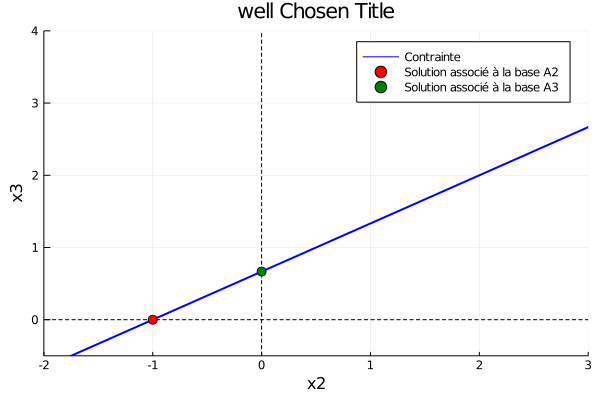

In [2]:
plot(x -> (2 + 2x)/3, color = :blue, linewidth = 2, label = "Contrainte")
hline!([0], color = :black, linestyle = :dash, label = "")
vline!([0], color = :black, linestyle = :dash, label = "")
plot!(xlims = (-2, 3), ylims = (-0.5, 4))
scatter!([-1], [0], markersize = 5, label = "Solution associé à la base A2", color = :red)
scatter!([0], [2/3], markersize = 5, label = "Solution associé à la base A3", color = :green)
plot!(title = "well Chosen Title")
plot!(xlabel = "x2", ylabel = "x3")

$\textbf{Remarque importante : }$
Le problème n'est pas borné inférieurement. Il n'y a donc pas de solution optimale. A3 n'est pas une base optimale. 

## 3. Exercice 3

Considérons le problème suivant
\begin{align*}
  \min_x\ & c^Tx \\
  \mbox{sujet à } & Ax = b \\
\end{align*}
qui s'écrit aussi:
\begin{align*}
  \text{Min }     & c^T x \\
  \text{Sujet à } & \sum_{j = 1}^{n} a_{ij}x_j = b_i,\ i= 1, ..., m \\
\end{align*}
En ramenant le problème à la forme standard, montrez qu'il n'existe pas de solution de base telle que pour un indice $j$ donné, $x_j^{+}$ et $x_j^{-}$ soient dans la base.

Les variables $x_j$ étant libres, on les remplace par:
$x_j = x_j^{+} - x_j^{-}$, avec $x_j^{+}, x_j^{-}\geq 0$.

On fait les substitions et on obtient le problème sous *forme standard*
\begin{align*}
\min_x\ & c^t x^+ - c^t x^-\\
\text{ Sujet à } & \sum_{j=1}^n a_{ij} x_j^+ - \sum_{j=1}^n a_{ij} x_j^- = b_i,\ i=1,\ldots, m\\
 & x^+, \ x^- \ge 0
\end{align*}

Montrons qu'il n'existe pas de solution de base, où pour un indice $j$ donné, $x_j^{+}$ et $x_j^{-}$ sont dans la base. 

$\textit{La preuve est une preuve par contradiction.}$
Supposons qu'il existe une base $B$, qui pour un $j$ donné, comprend les colonnes associées aux variables $x_j^{+}$ et $x_j^{-}$.
$B$ est donc de la forme: 
$$
B = \begin{pmatrix}
     \cdots & a_{1j} & \cdots & -a_{1j} & \cdots \\
     \cdots & a_{2j} & \cdots & -a_{2j} & \cdots \\
     \cdots & a_{3j} & \cdots & -a_{3j} & \cdots \\
         &  \vdots  & \ddots &  \vdots \\  
     \cdots & a_{mj}  & \cdots & -a_{mj} & \cdots     
\end{pmatrix}
$$
$B$ a alors 2 colonnes linéairement dépendantes, ce qui est en contradiction avec l'inversibilité de $B$, et donc que $B$ est une base.

## 4. Exercice 8 page 30

Transformez le problème suivant en un programme linéaire sous forme standard:
\begin{align*}
\min\ & |x| + |y| + |z| \\
\mbox{t.q. } &  x + y \leq 1 \\
& 2x + z = 3
\end{align*}



Introduisons 3 nouvelles variables positives ou nulles. 

$u = |x|$, $v = |y|$, $w = |z|$ 

$|x| = \max \{x, -x\} $ 

Par conséquent: 

\begin{align*}
u \geq x  \quad u \geq -x
\end{align*}

De même :
\begin{align*}
v \geq  y  \quad v \geq -y \\
w \geq  z  \quad w \geq -z 
\end{align*}

x, y et z étant des variables libres nous les exprimons par une différence de deux variables positives:
\begin{eqnarray}
% \nonumber to remove numbering (before each equation)
  x &=& x^+ - x^- \\
  y &=& y^+ - y^- \\
  z &=& z^+ - z^- 
\end{eqnarray}
$x^+, x^-, y^+, y^-, z^+, z^- \geq 0$

On remplace x, y et z par leurs expressions.
La forme standard du problème est:

\begin{align*}
  \min\ & u + v + w  \\
  \text{Sujet à }& -u + x^+ - x^-  + s_1  = 0\\
   & -u - x^+ + x^- + s_2  = 0\\
   & -v + y^+ - y^- + s_3  = 0\\
   & -v - y^+ + y^- + s_4  = 0\\
   & -w + z^+ - z^- + s_5  = 0\\
   & -w - z^+ + z^- + s_6  =  0\\
   & x^+ -x^- + y^+ -y^- + s = 1 \\
   & 2x^+ - 2x^- + z^+ - z^- = 3 \\
   & u, v, w \geq 0 \\
   & x^+, x^-, y^+, y^-, z^+, z^- \geq 0 \\
   & s, s_1, s_2, s_3, s_4, s_5, s_6 \geq 0
\end{align*}



## 5. Julia

**Ecrivez un code Julia permettant de calculer toutes les solutions de base d'un système linéaire $Ax = b$.**

**Écrivez une fonction qui trouve le minimum d'un programme linéaire (en assumant qu'il existe) en utilisant la fonction précédente.**

Nous allons essentiellement remettre en fonction ce que nous avions fait à la démonstration $1$.

Nous allons introduire une fonction permettant de calculer et stocker les solutions de base et les bases associées.

Le concept de fonction en Julia est expliqué à la page https://docs.julialang.org/en/v1/manual/functions/index.html

Une fonction est un objet qui prend en entrée une liste d'arguments et retourne une valeur.

In [3]:
using Combinatorics
using LinearAlgebra

In [4]:
function basic_sols(A, b)
    m, n = size(A)
    C = collect(combinations(1:n,m)) # every combination of n choose m
    xb = Vector{Float64}()
    basis = Vector{Int64}()
    for i = 1:length(C)
        B = A[:,C[i]]
        if rank(B) == m
            # A vector is by defaut column-oriented, so we use vcat
            xb = vcat(xb, B\b)
            basis = vcat(basis, C[i])
        end
    end
    return xb, basis
end

basic_sols (generic function with 1 method)

Limitons-nous aux bases réalisables

In [5]:
function feasible_basic_sols(A, b)
    bases = []
    sols = []
    
    m, n = size(A)
    comb = collect(combinations(1:n,m)) # every combination of n choose m
    for i = 1:length(comb)
        B = A[:,comb[i]]
        if rank(B) == m
            y = B\b # analytically equivalent to y = B^{-1}*b
            if all( y .>= 0)
                # A vector is by defaut column-oriented, so we use vcat
                bases = vcat(bases, i)
                sol = zeros(n)
                sol[comb[i]] = y
                sols = vcat(sols, [sol])
            end
        end
    end
    return sols, bases
end

feasible_basic_sols (generic function with 1 method)

Finalement, nous pouvons chercher la solution optimale en cherchant celle qui donne la plus petite valeur de la fonction objectif.

In [6]:
function enumerate_solve(A,b,c)
    feasible_basic_sols(A, b)
    sols, B = feasible_basic_sols(A, b);
    idx = 1
    opt = c'*sols[1][1:2]
    for i = 2:length(sols)
        temp = c'*sols[i][1:2]
        if (temp < opt)
            idx = i
            opt = temp
        end
    end
    return sols[idx], opt
end

enumerate_solve (generic function with 1 method)

#### Exemple 3 page 25
\begin{align}
    \text{Min} & -2x_1 - x_2 \\
    \text{Sujet à } & x_1 + \frac{8}{3}x_2 + x_3 = 4 \\
            & x_1+x_2 + x_4 = 2 \\
            & 2x_1 + x_5 = 3 \\
            & x_1, x_2, x_3, x_4, x_5 \geq 0
\end{align}

In [16]:
A = [1 8/3 1 0 0; 1 1 0 1 0; 2 0 0 0 1]
b = [4.0, 2, 3]
c = [-2.0, -1]
xstar, vstar = enumerate_solve(A,b,c)

([1.5, 0.5, 1.1666666666666667, 0.0, 0.0], -3.5)

In [22]:
#vérification des résultats, xstar est vraiment une solution réalisable??
println(A*xstar - b)
#oui

[0.0, 0.0, 0.0]


## Résolutions de systèmes linéaires et inversion de matrices

Remarquons que nous n'avons pas utiliser l'inversion de matrice pour résoudre le système $Bx_B = b$, alors que mathématiquement, la réponse est $x_B = B^{-1}b$. Pourtant, Julia dispose d'une fonction pour inverser une matrice: `inv`. Numériquement, il est conseillé d'éviter autant que possible de calculer l'inverse d'une matrice.

Nous allons considérer pour illustrer le phénomène un exemple adapté de https://www.reddit.com/r/programming/comments/argsg/dont_invert_that_matrix/c0j17m7/

La librairie MatrixDepot permet de générer diverses matrices ayant une structure particulière. Nous allons ici considérer une matrice de Hilbert de taille 10 par 10.

In [8]:
#using MatrixDepot

In [9]:
n = 10
#A = matrixdepot("hilb", n)
A = [1/(i + j - 1) for i in 1:n, j in 1:n]

10×10 Array{Float64,2}:
 1.0       0.5        0.333333   …  0.125      0.111111   0.1
 0.5       0.333333   0.25          0.111111   0.1        0.0909091
 0.333333  0.25       0.2           0.1        0.0909091  0.0833333
 0.25      0.2        0.166667      0.0909091  0.0833333  0.0769231
 0.2       0.166667   0.142857      0.0833333  0.0769231  0.0714286
 0.166667  0.142857   0.125      …  0.0769231  0.0714286  0.0666667
 0.142857  0.125      0.111111      0.0714286  0.0666667  0.0625
 0.125     0.111111   0.1           0.0666667  0.0625     0.0588235
 0.111111  0.1        0.0909091     0.0625     0.0588235  0.0555556
 0.1       0.0909091  0.0833333     0.0588235  0.0555556  0.0526316

La matrice de Hilbert est définie en prenant $\forall i, j$:
$$
a_{ij} = \frac{1}{i + j - 1}.
$$
Ceci peut se voir en affichant les entrées de la matrice sous forme de rationels:

In [10]:
#matrixdepot("hilb", Rational, n)
[1//(i + j - 1) for i in 1:n, j in 1:n]

10×10 Array{Rational{Int64},2}:
 1//1   1//2   1//3   1//4   1//5   1//6   1//7   1//8   1//9   1//10
 1//2   1//3   1//4   1//5   1//6   1//7   1//8   1//9   1//10  1//11
 1//3   1//4   1//5   1//6   1//7   1//8   1//9   1//10  1//11  1//12
 1//4   1//5   1//6   1//7   1//8   1//9   1//10  1//11  1//12  1//13
 1//5   1//6   1//7   1//8   1//9   1//10  1//11  1//12  1//13  1//14
 1//6   1//7   1//8   1//9   1//10  1//11  1//12  1//13  1//14  1//15
 1//7   1//8   1//9   1//10  1//11  1//12  1//13  1//14  1//15  1//16
 1//8   1//9   1//10  1//11  1//12  1//13  1//14  1//15  1//16  1//17
 1//9   1//10  1//11  1//12  1//13  1//14  1//15  1//16  1//17  1//18
 1//10  1//11  1//12  1//13  1//14  1//15  1//16  1//17  1//18  1//19

Définissons un vecteur avec des 1 comme seules entrées, et formons le terme de droite $b$ en le multipliant par $A$.

In [11]:
x = ones(n)
b = A*x

10-element Array{Float64,1}:
 2.9289682539682538
 2.0198773448773446
 1.603210678210678
 1.3468004218004217
 1.168228993228993
 1.0348956598956598
 0.9307289932289932
 0.8466953797836151
 0.7772509353391707
 0.718771403175428

Analysons l'erreur numérique en résolvant le système $Ax = b$.

In [12]:
[norm(x-A\b), norm(x-inv(A)*b)]

2-element Array{Float64,1}:
 0.0002741818135171358
 0.0007910416733272217

Nous voyons que l'erreur numérique est plus grande est résolvant le système à l'aide de l'inversion de matrice qu'en appelant la commande `A\b`.

Analysons aussi son temps d'exécution. Pour ce faire, nous utiliserons la libraire BenchmarkTools.

In [13]:
using BenchmarkTools

In [14]:
@benchmark A\b

BenchmarkTools.Trial: 
  memory estimate:  1.19 KiB
  allocs estimate:  3
  --------------
  minimum time:     1.059 μs (0.00% GC)
  median time:      1.095 μs (0.00% GC)
  mean time:        1.247 μs (2.19% GC)
  maximum time:     145.586 μs (98.20% GC)
  --------------
  samples:          10000
  evals/sample:     10

In [15]:
@benchmark (inv(A)*b)

BenchmarkTools.Trial: 
  memory estimate:  6.34 KiB
  allocs estimate:  5
  --------------
  minimum time:     1.923 μs (0.00% GC)
  median time:      2.014 μs (0.00% GC)
  mean time:        2.357 μs (10.37% GC)
  maximum time:     191.855 μs (96.48% GC)
  --------------
  samples:          10000
  evals/sample:     10

En plus d'être moins précise, la méthode est plus lente!